In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import hexprop as hp

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
# Define parameters
wl = 520e-9 # Wavelength
n = 462 # Sampling resolution (2, n, m)
m = int(n * 1.5)
s_h = 10.7457e-6 # Sample spacing
z = 0.2 # Propagation distance

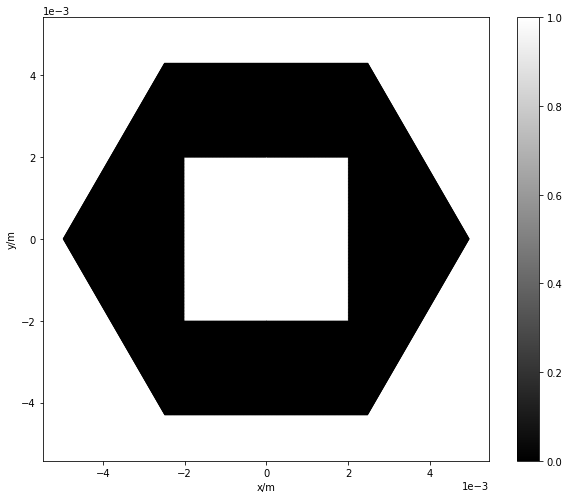

In [13]:
# Define the source amplitude
a0 = hp.rectangular(n, m, s_h, 2e-3)
hp.Hex(a0).set_side(s_h).plot(datatype='amplitude', figsize=(10, 8), cmap='gray')

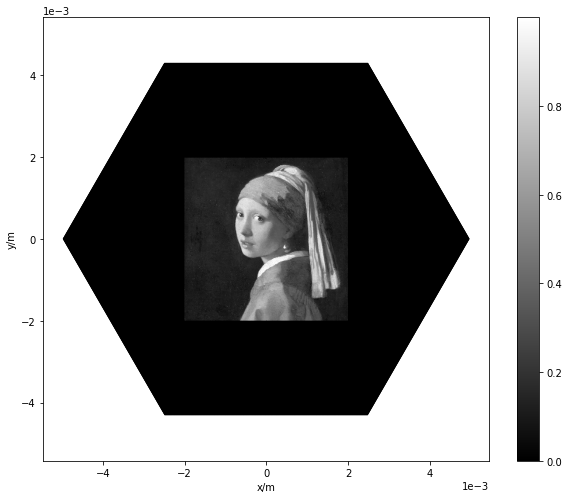

In [12]:
# Define the target amplitude of diffracted field
a1_target = hp.img2hex(n, m, s_h, 4e-3, 'data/target_06.png')
hp.Hex(a1_target).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

In [14]:
# Calculate the phase retrieval result of back-propagation
p0, norm, _ = hp.phase_retrieval_bp(a0.to(device), a1_target, s_h, wl, z,
                                    lr=0.01, optim='Adam',
                                    normalization=True,
                                    method='FresnelIR',
                                    p_initial=torch.zeros_like(a0),
                                    max_iter=100)

0 ,    0.13856388628482819
1 ,    0.12517987191677094
2 ,    0.11484760046005249
3 ,    0.10609578341245651
4 ,    0.0981716588139534
5 ,    0.0907391831278801
6 ,    0.08365916460752487
7 ,    0.0768788605928421
8 ,    0.07038246840238571
9 ,    0.06417158246040344
10 ,    0.05825730413198471
11 ,    0.05265691876411438
12 ,    0.047391314059495926
13 ,    0.04248195141553879
14 ,    0.03794822096824646
15 ,    0.03380480408668518
16 ,    0.030059562996029854
17 ,    0.02671189047396183
18 ,    0.023751944303512573
19 ,    0.02116081304848194
20 ,    0.018911801278591156
21 ,    0.016972456127405167
22 ,    0.015307096764445305
23 ,    0.013879329897463322
24 ,    0.012654188089072704
25 ,    0.011599660851061344
26 ,    0.01068754680454731
27 ,    0.009893747977912426
28 ,    0.009198114275932312
29 ,    0.008584056049585342
30 ,    0.008038042113184929
31 ,    0.007549087051302195
32 ,    0.007108278572559357
33 ,    0.006708398927003145
34 ,    0.006343594752252102
35 ,    0.006009

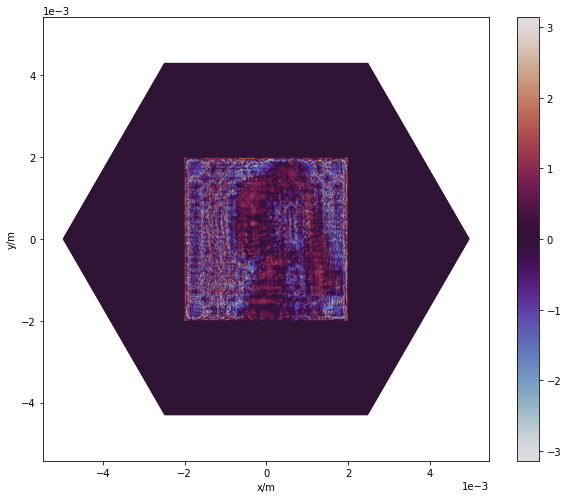

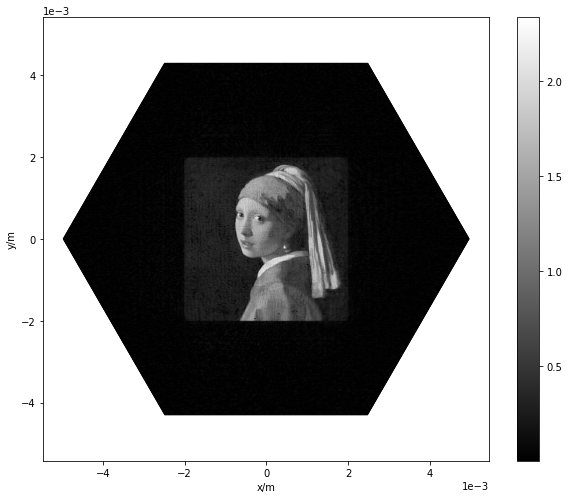

In [15]:
# Check the result
u_0 = a0 * torch.exp(1j * p0)
hp.Hex(u_0).set_side(s_h).plot(datatype='phase', figsize=(10, 8), cmap='twilight')
prop = hp.Prop(n, m, s_h, wl, z, method='FresnelIR')
u_1 = prop(u_0)
hp.Hex(u_1).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

In [17]:
# Calculate the phase retrieval result of Gerchberg-Saxton algorithm
p0, _ = hp.phase_retrieval_gs(a0.to(device), a1_target, s_h, wl, z,  
                              method='FresnelIR', 
                              p_initial=torch.zeros_like(a0),
                              max_iter=100)

0 ,    0.13856388628482819
1 ,    0.1414564698934555
2 ,    0.14324988424777985
3 ,    0.14403961598873138
4 ,    0.1445295363664627
5 ,    0.14504995942115784
6 ,    0.1454748809337616
7 ,    0.1461070030927658
8 ,    0.14701522886753082
9 ,    0.14837312698364258
10 ,    0.1500367671251297
11 ,    0.15198750793933868
12 ,    0.1540536731481552
13 ,    0.1561311036348343
14 ,    0.15819352865219116
15 ,    0.16021840274333954
16 ,    0.16210877895355225
17 ,    0.16375192999839783
18 ,    0.16519059240818024
19 ,    0.16656985878944397
20 ,    0.16791974008083344
21 ,    0.1692032366991043
22 ,    0.17048317193984985
23 ,    0.1717267632484436
24 ,    0.1728992611169815
25 ,    0.17400529980659485
26 ,    0.17504315078258514
27 ,    0.17601819336414337
28 ,    0.17691166698932648
29 ,    0.17774556577205658
30 ,    0.17852452397346497
31 ,    0.17925485968589783
32 ,    0.17993707954883575
33 ,    0.18056786060333252
34 ,    0.1811521053314209
35 ,    0.18171480298042297
36 ,    0.182

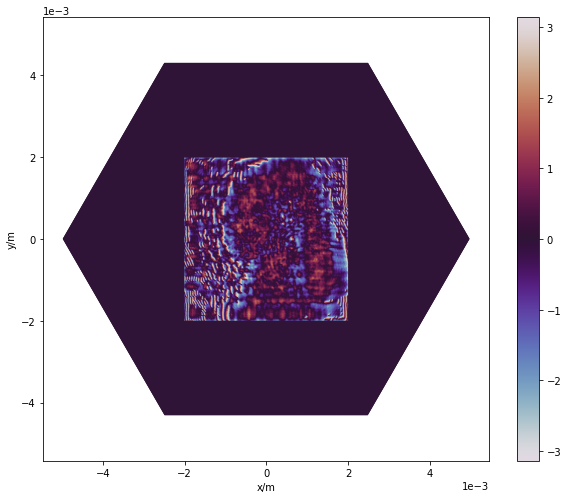

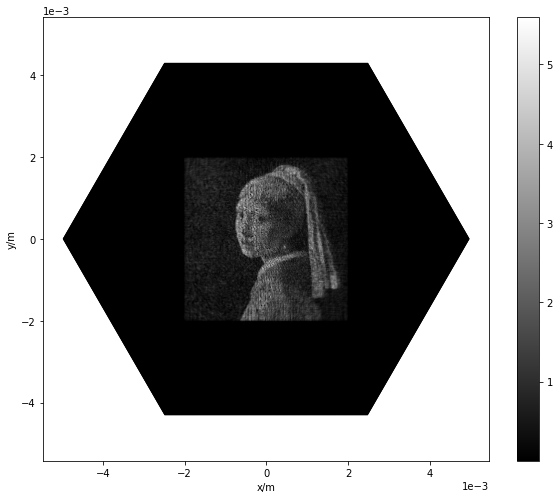

In [18]:
# Check the result
u_0 = a0 * torch.exp(1j * p0)
hp.Hex(u_0).set_side(s_h).plot(datatype='phase', figsize=(10, 8), cmap='twilight')
prop = hp.Prop(n, m, s_h, wl, z, method='FresnelIR')
u_1 = prop(u_0)
hp.Hex(u_1).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')